## Анализ полученных данных

Статистика по вакансиям для удобного отображения вынесена в отдельную тетрадку.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
sns.set()

### Загрузка данных

In [2]:
df = pd.read_csv('hh_data.csv')
df[df['Salary']][0:7]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
4,32799001,Citibank,Lead Data Scientist,True,261000.0,NaN,От 3 до 6 лет,Полный день,"['Data Mining', 'Big Data', 'Data Analysis', '...",What is Citi? Citi is one of the largest consu...
13,32500962,Жилищная Экосистема ВТБ,Lead data scientist,True,200000.0,NaN,От 3 до 6 лет,Полный день,"['JavaScript', 'Python', 'MS SQL']",Жилищная Экосистема ВТБ - это IT-стартап на ст...
14,30250856,Связной,Главный аналитик-математик (Data Analyst / Dat...,True,180000.0,230000.0,От 3 до 6 лет,Полный день,"['Data Mining', 'Python', 'Управление проектам...",Требования: Высшее образование (приветствуютс...
15,32907619,Сбербанк,Data Scientist/ Machine Learning Engineer/ NLP...,True,180000.0,NaN,От 1 года до 3 лет,Полный день,[],"Мы ищем опытного DL - специалиста, увлеченного..."
18,32853797,Гумич,Data Scientist/Machine Learning Engineer,True,100000.0,250000.0,От 1 года до 3 лет,Полный день,"['computer vision', 'machine learning', 'deep ...",О компании: Гумич - частная научно-производств...
20,32059309,DC Daily,Machine Learning Engineer / Data Scientist,True,150000.0,NaN,От 1 года до 3 лет,Полный день,[],"Мы - российский стартап Delivery Club Daily, к..."
35,30026091,COMPAREX,Data Scientist,True,87000.0,217500.0,От 3 до 6 лет,Полный день,"['machine learning', 'Big Data']","SoftwareONE (ранее COMPAREX), глобальная ведущ..."


### Количество вакансий

In [3]:
print('Number of vacancies: {}'.format(df['Id'].count()))

Number of vacancies: 298


### Вакансия с максимальной зарплатой

In [4]:
df.iloc[df[['From', 'To']].idxmax()]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
44,32644403,Kelly,Intelligent Platform Technical Expert (machine...,True,300000.0,NaN,Более 6 лет,Полный день,"['AI algorithms', 'TensorFlow', 'Pytorch', 'Ja...",Huawei Technologies is looking for Intelligent...
93,32633458,Parascript,Программист-математик/ алгоритмист (США),True,NaN,403151.0,От 1 года до 3 лет,Полный день,"['C++', 'умение разрабатывать алгоритмы', 'C#'...","Вакансия: Программист-математик, алгоритмистАм..."


### Вакансия с минимальной зарплатой

In [5]:
df.iloc[df[['From', 'To']].idxmin()]

,Id,Employer,Name,Salary,From,To,Experience,Schedule,Keys,Description
104,32903593,Retail Rocket,Младший аналитик,True,50000.0,NaN,Нет опыта,Полный день,"['Unix', 'Linux', 'SQL']",Компания Retail Rocket предоставляет набор реш...
191,32923854,Технологии в образовании,Ментор онлайн-курса по веб-разработке на Python,True,NaN,20000.0,От 1 года до 3 лет,Удаленная работа,"['CSS', 'Git', 'Linux', 'JavaScript', 'Django ...",Мы SkillFactory - одна из самых быстрорастущих...


### Статистика по зарплатам

Здесь отображается количество вакансий с указанными зарплатами "От" и "До", производится подсчет таких вакансий, а также некоторые свойства: среднее, медиана, минимальное и максимальное значение.

In [6]:
df_stat = df[['From', 'To']].describe().applymap(np.int32)
df_stat.iloc[list(range(4))+[-1]]

,From,To
count,39,29
mean,152330,201251
std,64205,77803
min,50000,20000
max,300000,403151


### График зарплат

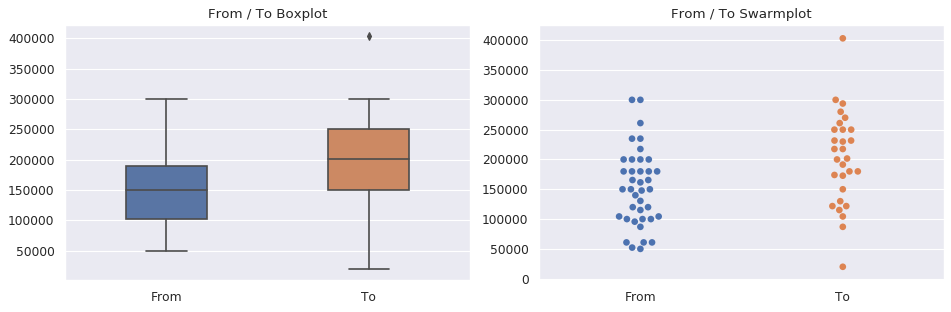

In [7]:
fz = plt.figure(figsize=(12, 4), dpi=80)
ax = fz.add_subplot(1, 2, 1)
plt.title('From / To Boxplot')
sns.boxplot(data=df[['From', 'To']], width=0.4)
ax = fz.add_subplot(1, 2, 2)
plt.title('From / To Swarmplot')
sns.swarmplot(data=df[['From', 'To']], size=6)
plt.tight_layout()
plt.savefig('from_to.png')

### Усредненная статистика

Поскольку не у всех вакансий указаны поля "От" и "До", производится расчет средней зарплаты, а на основании этих данных рассчитывается статистика.

In [8]:
comb_from_to = np.nanmean(df[df['Salary']][['From', 'To']].to_numpy(), axis=1)
print('Average statistics (average filter for "From"-"To" parameters):')
print('Mim    : %d' % np.min(comb_from_to))
print('Max    : %d' % np.max(comb_from_to))
print('Mean   : %d' % np.mean(comb_from_to))
print('Median : %d' % np.median(comb_from_to))

Average statistics (average filter for "From"-"To" parameters):
Mim    : 20000
Max    : 403151
Mean   : 175647
Median : 174000


### Список часто используемых слов

В этом разделе производится поиск наиболее употребляемых слов для параметра **Ключевые навыки**. Результа функции - список в порядке убывания.

In [9]:
def most_keys():
    # Collect keys from dataframe
    keys_df = df['Keys'].to_list()
    
    # Create a list of keys for all vacancies
    lst_keys = []
    for keys_elem in keys_df:
        for el in keys_elem[1:-1].split(', '):
            if el != '':
                lst_keys.append(re.sub('\'', '', el.lower()))

    # Unique keys and their counter
    set_keys = set(lst_keys)
    # Dict: {Key: Count}
    dct_keys = {el:lst_keys.count(el) for el in set_keys}
    # Sorted dict
    srt_keys = dict(sorted(dct_keys.items(), key=lambda x: x[1], reverse=True))
    # Return pandas series
    return pd.Series(srt_keys, name='Keys')

In [10]:
ds_keys = most_keys()

print(ds_keys[:15])

python                       91
machine learning             56
sql                          35
data mining                  26
c++                          25
big data                     23
java                         21
математическая статистика    19
javascript                   19
data analysis                18
data science                 16
linux                        15
tensorflow                   13
deep learning                13
английский язык              13
Name: Keys, dtype: int64


### Описание вакансий

Поиск наиболее употребляемых слов для параметра **Описание вакансий**.  
Результат функции - список наиболее часто употребляемых слов (на английском языке) в порядке убывания.

In [11]:
def most_words():
    # Collect keys from dataframe
    words_df = df['Description'].to_list()
    # Long string - combine descriptions
    words_ls = ' '.join([re.sub(' +', ' ', re.sub('\d+', '', el.strip().lower())) for el in words_df])
    # Find all words
    words_re = re.findall('[a-zA-Z]+', words_ls)
    # Filter words with length < 3
    words_l2 = [el for el in words_re if len(el) > 2]
    # Unique words
    words_st = set(words_l2)
    # Remove 'stop words'
    stop_words = set(stopwords.words('english'))
    # XOR for dictionary
    words_st ^= stop_words
    # Dictionary - {Word: Counter}
    words_cnt = {el : words_l2.count(el) for el in words_st}
    # Pandas series
    return pd.Series(dict(sorted(words_cnt.items(), key=lambda x: x[1], reverse=True)))

In [12]:
ds_words = most_words()

print(ds_words.head(15))

data           640
learning       494
experience     417
machine        365
python         241
business       235
team           227
skills         208
development    196
work           162
amp            145
science        144
knowledge      142
solutions      141
sql            132
dtype: int64
